In [30]:
# pandas is used here to read in a dataset 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets._california_housing import fetch_california_housing

cali_data = fetch_california_housing()

# dataset = pd.read_csv(data)

dataset = pd.DataFrame(cali_data.data, columns=cali_data.feature_names)
dataset.head()




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [31]:
# in this example simply we're going to see if from the metrics above we can predict the medium income based on housing statistics:)
# firstly we need to split data into features & labels, features being characteristics of the dataset in this case lets just check the house age & the avg rooms, and labels being the median income

features = dataset[['HouseAge', 'AveRooms']]
labels = dataset['MedInc']




In [32]:
# before we can model predictions dataset needs to be split into training, testing and validation sets

#note here splits can oly split into two items so we have to split the test data into two parts
# random state ensures that for everytime we run this model the examples never swap groups
# test size just informs dataset how much we want to split bye  

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print('X splits')
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print('y splits')
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


X splits
(12384, 2)
(4128, 2)
(4128, 2)
y splits
(12384,)
(4128,)
(4128,)


In [33]:
reg = linear_model.LinearRegression()

linear_reg = reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
print('mse:',mse_test)


mse: 3.46778849592593


In [34]:
# this coeficcent tells us the the relationship between the house age and the house price, and then the relationship between the number of rooms  and the house income
print(linear_reg.coef_)
random_pred = linear_reg.predict([[50, 7]])
print(f' house of age 50, with 7 rooms is predicted to have a median income of {random_pred}')


[-0.00913961  0.28237463]
 house of age 50, with 7 rooms is predicted to have a median income of [4.11329349]


/Users/paddy/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: x and y must be the same size

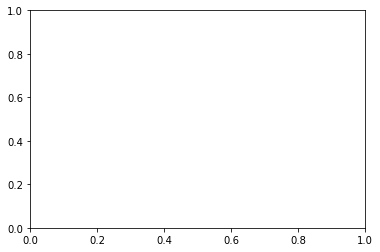

In [35]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()
